# Libraries
Requires Python>=3.9.1\
and libraries in requirements.txt 

In [1]:
import pandas as pd 
import numpy as np 

from keras.utils import to_categorical


import matplotlib.pyplot as plt 
## below line works only in jupyter notebooks
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')


# Data

In [2]:
train_data_file = r'.\Data\train.csv'
test_data_file = r'Data\test.csv'

In [3]:
orig_train_df = pd.read_csv(train_data_file)
print(orig_train_df.shape)
orig_train_df

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
orig_test_df = pd.read_csv(test_data_file)
print(orig_test_df.shape)
orig_test_df

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
orig_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# check for any column its unique values
orig_train_df['pixel143'].unique() 

array([  0,  36, 148,  58, 117, 161,  11,  28,  10,  13,  12,  80,  23,
        71,  18,  50,   5,   2,  25,  22,  31,  42,   4, 171,  86,  55,
        77,  57,   7,  75,  40,  67, 255])

In [7]:
x_train = (orig_train_df.iloc[:,1:].values).astype('float32')
y_train = (orig_train_df.iloc[:,0].values).astype('int32')
x_test = orig_test_df.values.astype('float32')
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
x_train.size

32928000

In [9]:
y_train

array([1, 0, 1, ..., 7, 6, 9], dtype=int32)

The target variable has values from 0 to 9 total 10 unique values.\
Since this is not a continuous data and it has more than 2 descrete values.\
This is a **Multi class classification** problem.

# Data Visulalization
Lets look at the data we have collected so far. We have the following data:

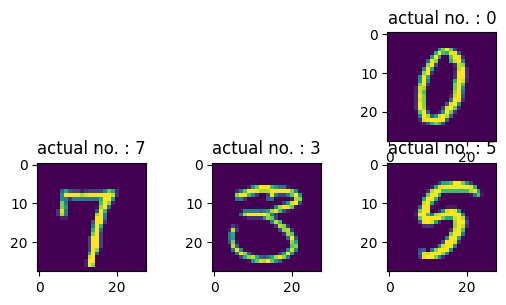

In [10]:
# Convert train dataset to (num_images, img_rows, img_cols) format
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)

for i in range( 5, 9):
    plt.subplot(330+ (i+1))
    plt.imshow(x_train[i])
    plt.title(f'actual no. : {y_train[i]}')

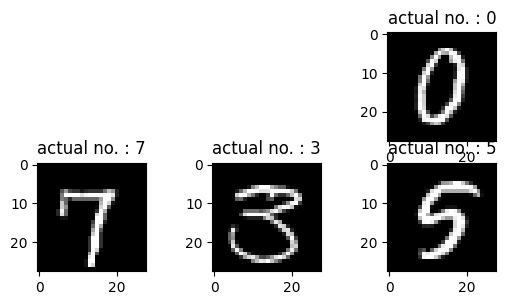

In [11]:
# Convert train dataset to (num_images, img_rows, img_cols) format
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)

for i in range( 5, 9):
    plt.subplot(330+ (i+1))
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title(f'actual no. : {y_train[i]}')

In [12]:
# expand 1 more dimension as 1 for colour channel - gray
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train.shape

(42000, 28, 28, 1)

In [13]:
x_test = x_test.reshape(x_test.shape[0], 28,28, 1)
x_test.shape

(28000, 28, 28, 1)

# Pre processing the digit images
## Feature Standardization
Here we center the data around zero mean and unit variance.

In [14]:
mean_x = x_train.mean().astype(np.float32)
std_x = x_train.std().astype(np.float32)
mean_x, std_x


(np.float32(33.408936), np.float32(78.67759))

In [15]:
def standardize(x):
    return (x-mean_x)/std_x 

## One hot encoding
One-hot encoding is a technique used to convert categorical variables into numerical variables. \
It is a way to replace 0 to 9 , with its equivalent 1 when it corresponding value is true

For example 2, would be [0,0,1,0,0,0,0,0,0,0]

In [16]:
y_train.shape, y_train

((42000,), array([1, 0, 1, ..., 7, 6, 9], dtype=int32))

In [17]:
y_train = to_categorical(y_train)
num_classes = y_train.shape[1]
num_classes, y_train

(10,
 array([[0., 1., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.]]))

In [18]:
y_train.shape

(42000, 10)

Lets plot randomly from ytrain

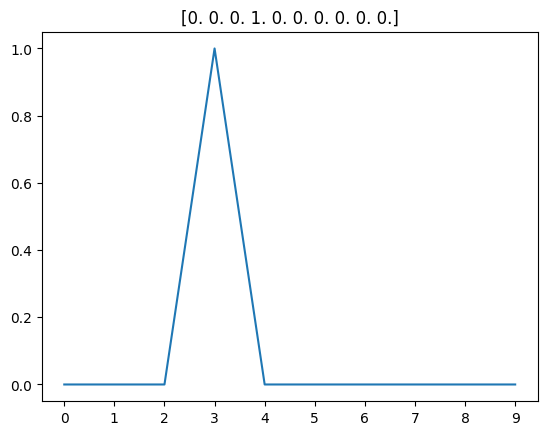

In [19]:
plt.title(y_train[9])
plt.plot(y_train[9])
plt.xticks(range(10))
plt.show()

Ohh ho its 3!

# Designing Neural Network Architecture

In [20]:
# Set the random seed, for reproducability

seed = 143
np.random.seed(seed)

epochs = 10

## Linear Model

In [21]:
from keras.models import Sequential
from tensorflow.keras.layers import Lambda, Dense, Flatten, Dropout #from keras.layers.B # import Lambda, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Convolution2D, MaxPooling2D

Lets create a simple model from Keras Sequential layer.\
1. Lambda layer performs simple arithmetic operations like sum, average, exponentiation, etc.\
In 1st layer of the model we have to define input dimensions of our data in (rows, columns, colour channel) format. (in theano colour channel comes first).
2. Flatten will transform input into 1D array.
3. Dense is fully connected layer that means all neurons in previous layers will be connected to all neurons in fully connected layer.\
In the last layer we have to specify output dimensions/classes of the model. Here it's 10, since we have to output 10 different digit labels.

In [22]:
model = Sequential()
model.add(
    Lambda(standardize, input_shape=(28,28,1))
)
model.add(
    Flatten()
)
model.add(Dense(10, activation='softmax'))

print(f'input shape: {model.input_shape}')
print(f'output shape: {model.output_shape}')



input shape: (None, 28, 28, 1)
output shape: (None, 10)


## Compile Network
Before making network ready for training we have to make sure to add below things:
1. A loss function: to measure how good the network is.
2. An optimizer: to update network as it sees more dta and reduce loss value
3. Metrics: to monitor performance of network

In [23]:
from keras.optimizers import RMSprop

model.compile(
    optimizer=RMSprop(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create an instance of ImageDataGenerator
gen = ImageDataGenerator()

## Cross validation

In [25]:
from sklearn.model_selection import train_test_split

x = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.2,
    random_state=seed
)

batches = gen.flow(x_train, y_train, batch_size=64)
val_batches = gen.flow(x_val, y_val, batch_size=64)

In [26]:
history = model.fit(
    x=batches,
    steps_per_epoch=batches.n,
    epochs=10,
    validation_data=val_batches,
    validation_steps=val_batches.n
)

Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 118us/step - accuracy: 0.8559 - loss: 0.4767 - val_accuracy: 0.9126 - val_loss: 0.3124
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 4s 115us/step - accuracy: 0.9094 - loss: 0.3089 - val_accuracy: 0.9195 - val_loss: 0.2952
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 4s 112us/step - accuracy: 0.9164 - loss: 0.2907 - val_accuracy: 0.9212 - val_loss: 0.2829
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 96us/step - accuracy: 0.9199 - loss: 0.2806 - val_accuracy: 0.9257 - val_loss: 0.2757
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 102us/step - accuracy: 0.9226 - loss: 0.2742 - val_accuracy: 0.9251 - val_loss: 0.2755
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 95us/step - accuracy: 0.9239 - loss: 0.2698 - val_accuracy: 0.9264 - val_loss: 0.2750
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 96us/step - accuracy: 0.9265 - loss: 0.2658 - val_accuracy: 0.9227 - val_loss: 0.2763
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 2s 71us/step - accura

In [27]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

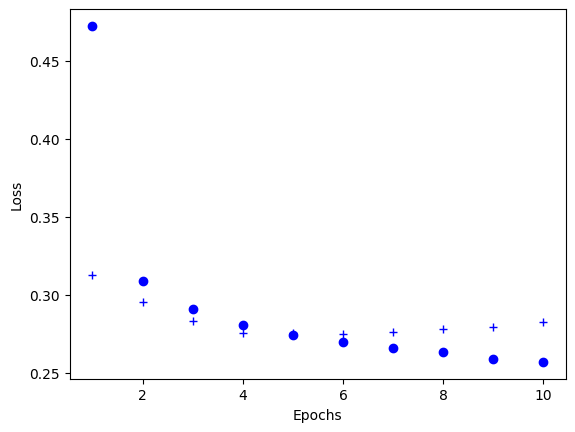

In [28]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = list(range(1, len(loss_values)+1))


# 'bo' is for 'blue dot'
plt.plot(epochs, loss_values, 'bo')
# b+ is for 'blue crosses' 
plt.plot(epochs, val_loss_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

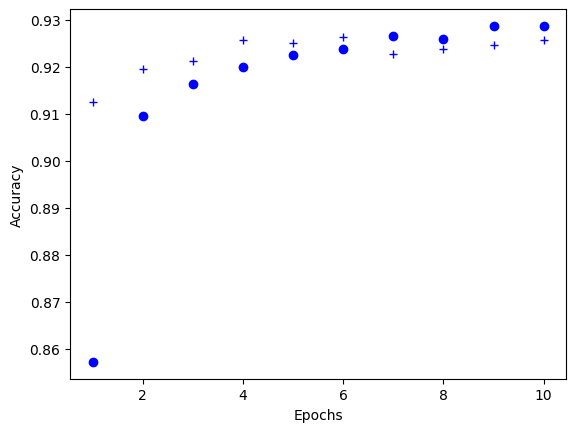

In [29]:
plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo')
plt.plot(epochs, val_acc_values, 'b+')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Fully Connected Model

In [30]:
def get_fc_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
    ]      
    )
    model.compile(
        optimizer='Adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [31]:
fc = get_fc_model()
fc.optimizer.learning_rate = 0.001

In [32]:
epochs=10

In [33]:
history = fc.fit(
    x=batches,
    steps_per_epoch=batches.n,
    epochs=epochs,
    validation_data=val_batches,
    validation_steps=val_batches.n
)

Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 136us/step - accuracy: 0.9218 - loss: 0.2511 - val_accuracy: 0.9563 - val_loss: 0.1366
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 102us/step - accuracy: 0.9695 - loss: 0.0989 - val_accuracy: 0.9683 - val_loss: 0.1056
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 102us/step - accuracy: 0.9801 - loss: 0.0620 - val_accuracy: 0.9724 - val_loss: 0.0936
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 5s 147us/step - accuracy: 0.9864 - loss: 0.0436 - val_accuracy: 0.9743 - val_loss: 0.0834
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 100us/step - accuracy: 0.9891 - loss: 0.0308 - val_accuracy: 0.9755 - val_loss: 0.0923
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 101us/step - accuracy: 0.9911 - loss: 0.0257 - val_accuracy: 0.9769 - val_loss: 0.0829
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 89us/step - accuracy: 0.9918 - loss: 0.0232 - val_accuracy: 0.9761 - val_loss: 0.0946
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 3s 97us/step - accu

## Convolution Neural Network
CNNS are extremely efficient for images

In [34]:
from keras.layers import Convolution2D, MaxPooling2D

def get_cnn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32, (3, 3), activation='relu'), 
        Convolution2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        Convolution2D(64, (3,3), activation='relu'),
        Convolution2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(10, activation='softmax')
        ])
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

    

In [35]:
model = get_cnn_model()
model.optimizer.learning_rate=0.001

In [36]:
history = model.fit(
    x=batches,
    steps_per_epoch=batches.n,
    epochs=epochs,
    validation_data=val_batches,
    validation_steps=val_batches.n    
)

Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 19s 523us/step - accuracy: 0.9498 - loss: 0.1616 - val_accuracy: 0.9821 - val_loss: 0.0540
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 24s 703us/step - accuracy: 0.9869 - loss: 0.0433 - val_accuracy: 0.9832 - val_loss: 0.0545
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 493us/step - accuracy: 0.9902 - loss: 0.0296 - val_accuracy: 0.9911 - val_loss: 0.0334
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 18s 531us/step - accuracy: 0.9929 - loss: 0.0221 - val_accuracy: 0.9896 - val_loss: 0.0380
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 21s 635us/step - accuracy: 0.9940 - loss: 0.0180 - val_accuracy: 0.9905 - val_loss: 0.0329
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 498us/step - accuracy: 0.9954 - loss: 0.0149 - val_accuracy: 0.9895 - val_loss: 0.0431
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 17s 491us/step - accuracy: 0.9956 - loss: 0.0139 - val_accuracy: 0.9914 - val_loss: 0.0351
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 16s 474us/s

## Data Augmentation
It is a technique of showing slightly different or new images to neural network to avoid overfitting. And to achieve better generalization.\
In case you have very small dataset, you can use different kinds of data augmentation techniques to increase you data size.\
Neural Networks perform bettery if you provide them more data.\
Different data augmentation techniques are as follows.
1. Cropping
2. Rotating
3. Scaling
4. Translating
5. Flipping
6. Adding Gaussian noise to input images etc.

In [37]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3, height_shift_range=0.08, zoom_range=0.08)
batches = gen.flow(x_train, y_train, batch_size=64)
val_batches = gen.flow(x_val, y_val, batch_size=64)                  

In [38]:
model.optimizer.learning_rate=0.001
history = model.fit(x=batches, steps_per_epoch=batches.n, epochs=epochs, validation_data=val_batches,validation_steps=val_batches.n)

Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 20s 583us/step - accuracy: 0.9801 - loss: 0.0642 - val_accuracy: 0.9869 - val_loss: 0.0483
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 20s 583us/step - accuracy: 0.9887 - loss: 0.0361 - val_accuracy: 0.9896 - val_loss: 0.0390
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 19s 578us/step - accuracy: 0.9919 - loss: 0.0275 - val_accuracy: 0.9886 - val_loss: 0.0388
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 19s 573us/step - accuracy: 0.9918 - loss: 0.0282 - val_accuracy: 0.9895 - val_loss: 0.0353
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 20s 588us/step - accuracy: 0.9925 - loss: 0.0235 - val_accuracy: 0.9888 - val_loss: 0.0385
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 19s 568us/step - accuracy: 0.9933 - loss: 0.0222 - val_accuracy: 0.9888 - val_loss: 0.0428
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 20s 596us/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9881 - val_loss: 0.0427
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 20s 586us/s

## Adding Batch Normalization
Batch normalization is a technique that normalizes the input to each layer, which helps to improve the stability\
To fine tune hyperparameters more better and train really deep neural networks.

In [39]:
from tensorflow.keras.layers import BatchNormalization
def get_bn_model():
    model = Sequential([
        Lambda(standardize, input_shape=(28,28,1)),
        Convolution2D(32, (3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(32, (3,3), activation='relu'),
        MaxPooling2D(),
        BatchNormalization(axis=1),
        Convolution2D(64, (3,3), activation='relu'),
        BatchNormalization(axis=1),
        Convolution2D(64, (3,3), activation='relu'),
        MaxPooling2D(),
        Flatten(),
        BatchNormalization(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dense(10, activation='softmax')
            ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [40]:
model = get_bn_model()
model.optimizer.learning_rate=0.001

In [41]:
history = model.fit(x=batches, steps_per_epoch=batches.n, epochs=epochs, validation_data=val_batches, validation_steps=val_batches.n)


Epoch 1/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 28s 747us/step - accuracy: 0.9476 - loss: 0.1688 - val_accuracy: 0.9655 - val_loss: 0.1157
Epoch 2/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 24s 717us/step - accuracy: 0.9773 - loss: 0.0724 - val_accuracy: 0.9788 - val_loss: 0.0730
Epoch 3/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 25s 740us/step - accuracy: 0.9853 - loss: 0.0488 - val_accuracy: 0.9813 - val_loss: 0.0616
Epoch 4/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 24s 717us/step - accuracy: 0.9861 - loss: 0.0443 - val_accuracy: 0.9785 - val_loss: 0.0692
Epoch 5/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 24s 724us/step - accuracy: 0.9885 - loss: 0.0384 - val_accuracy: 0.9879 - val_loss: 0.0388
Epoch 6/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 25s 732us/step - accuracy: 0.9886 - loss: 0.0367 - val_accuracy: 0.9877 - val_loss: 0.0478
Epoch 7/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 24s 724us/step - accuracy: 0.9874 - loss: 0.0381 - val_accuracy: 0.9819 - val_loss: 0.0636
Epoch 8/10
33600/33600 ━━━━━━━━━━━━━━━━━━━━ 24s 727us/s

# Predict Test data
Make sure you use full train dataset here to train model and predict on test set.

In [42]:
model.optimizer.learning_rate=0.01
gen = ImageDataGenerator()
batches = gen.flow(x, y, batch_size=64)
history = model.fit(x=batches, steps_per_epoch=batches.n, epochs=epochs)


Epoch 1/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 25s 602us/step - accuracy: 0.9716 - loss: 0.1146 
Epoch 2/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 26s 619us/step - accuracy: 0.9877 - loss: 0.0390 
Epoch 3/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 25s 591us/step - accuracy: 0.9883 - loss: 0.0387 
Epoch 4/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 24s 581us/step - accuracy: 0.9885 - loss: 0.0395 
Epoch 5/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 25s 582us/step - accuracy: 0.9891 - loss: 0.0365 
Epoch 6/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 25s 586us/step - accuracy: 0.9912 - loss: 0.0300 
Epoch 7/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 25s 583us/step - accuracy: 0.9902 - loss: 0.0324 
Epoch 8/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 25s 586us/step - accuracy: 0.9920 - loss: 0.0279 
Epoch 9/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 25s 586us/step - accuracy: 0.9912 - loss: 0.0302 
Epoch 10/10
42000/42000 ━━━━━━━━━━━━━━━━━━━━ 25s 590us/step - accuracy: 0.9933 - loss: 0.0243 


In [43]:
model.predict

<bound method TensorFlowTrainer.predict of <Sequential name=sequential_3, built=True>>

In [44]:
predictions = model.predict(x_test, verbose=1,)
predictions = np.argmax(predictions, axis=1)
submissions=pd.DataFrame({'ImageId':list(range(1, len(predictions)+1)),
                          'Label':predictions})
submissions.to_csv('predictions_test_data.csv', index=False, header=True)

875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step


In [45]:
predictions

array([2, 0, 9, ..., 3, 9, 2])

# End